# Exploratory data analysis

The objective of this notebook is to present <a href="https://en.wikipedia.org/wiki/Exploratory_data_analysis">**exploratory data analysis**</a> (EDA), which encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments.

The main distinction from EDA to our previous initial analysis is that while in the initial analysis we were concerned with the quality of the data and its suitability for analysis, during EDA we will focus on answering questions directly related to our research objective: 

**Example:** Which are the main attributes with the most impact on the car price?

#### Required libraries
* <a href = "https://pandas.pydata.org/"><code>Pandas</code></a>
* <a href = "https://www.scipy.org/"><code>Scipy</code></a> 
* <a href = "https://numpy.org/"><code>Numpy</code></a> 
* <a href = "https://numpy.org/"><code>Scikit-learn</code></a>
* <a href = "https://matplotlib.org/"><code>Matplotlib</code></a>
* <a href = "https://seaborn.pydata.org/"><code>Seaborn</code></a>

#### Table of contents
<ol>
    <li><a href="data_types">Data types</a></li>
    <li><a href="univariate_descriptive_analysis">Univariate descriptive analysis</a><br>
        2.1. <a href="measures_central_tendency">Measures of central tendency</a><br>
        2.2. <a href="measures_variability">Measures of variability</a><br>
        2.3. <a href="density_estimation">Density estimation</a>
    </li>
    <li><a href="bivariate_descriptive_analysis">Bivariate descriptive analysis</a><br>
        3.1. <a href="analysis_via_visualization">Analysis via visualization</a><br>
        3.2. <a href="correlation">Correlation</a><br>
        3.3. <a href="mutual_information">Mutual information</a><br>
    </li>
</ol>

----

<h2 id="attribute_types">1 - Data types</h2>

<img src="images/attribute_types.jpg" width="700">

#### `Pandas` data types

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("../../Data/automobile_nomissing.csv")
df.head(10)
#df.select_dtypes(exclude="object").head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430


#### <code>Pandas</code> categorical data
All values of categorical data are either in categories or np.nan. Order is defined by the order of categories, not lexical order of the values. Internally, the data structure consists of a categories array and an integer array of codes which point to the real value in the categories array.

The <code>categorical</code> data type is useful in the following cases:

* A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory (its memory usage is proportional to the number of categories plus the length of the data. In contrast, an object dtype is a constant times the length of the data).

In [4]:
s

0      foo
1      bar
2      foo
3      bar
4      foo
      ... 
195    bar
196    foo
197    bar
198    foo
199    bar
Length: 200, dtype: object

In [3]:
s = pd.Series(['foo', 'bar'] * 100)
print(s.nbytes)
print(s.astype('category').nbytes)

1600
216


In [5]:
s.astype('category')

0      foo
1      bar
2      foo
3      bar
4      foo
      ... 
195    bar
196    foo
197    bar
198    foo
199    bar
Length: 200, dtype: category
Categories (2, object): [bar, foo]

* The lexical order of a variable is not the same as the logical order (i.e., *low*, *medium*, *high*). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order.

In [6]:
s_array = ["low", "medium", "medium", "low", "high"]

# Categorical with lexical order 
s = pd.Series(pd.Categorical(s_array, ordered=True))
s.sort_values(inplace=True)
print(s)
print("Min: " + str(s.min()))
print("Max: " + str(s.max()))

4      high
0       low
3       low
1    medium
2    medium
dtype: category
Categories (3, object): [high < low < medium]
Min: high
Max: medium


In [8]:
# Categorical with specific order
s = pd.Series(pd.Categorical(s_array, categories = ["low", "medium", "high"], ordered=True))
s.sort_values(inplace=True)
print(s)
print("Min: " + str(s.min()))
print("Max: " + str(s.max()))

0       low
3       low
1    medium
2    medium
4      high
dtype: category
Categories (3, object): [low < medium < high]
Min: low
Max: high


* As a signal to other Python libraries that this column should be treated as a categorical variable (to give more information or for specific methods).
    
    * <a href="https://en.wikipedia.org/wiki/Ordinal_regression">**Ordinal regression**</a>

<h2 id="descriptive_univariate_analysis">2 - Descriptive univariate analysis</h2>

Univariate analysis separately describes each attribute in a dataset. It can be applied to both discrete and continuous attributes with some differences.

<h3 id="measures_central_tendency">2.1 - Measures of central tendency</h3>

Central tendency is one of the most common numerical descriptive measures. It's used to estimate the central location of the univariate data by the calculation of **mean**, **median** and **mode**.

* The <a href="https://en.wikipedia.org/wiki/Mean">**arithmetic mean**</a> is the central value of a discrete set of numbers: specifically, the sum of the values divided by the number of values. If the data set were based on a series of observations obtained by sampling from a statistical population, the arithmetic mean of an attribute $X$ is the sample mean (denoted $\displaystyle {\bar{x}})$ to distinguish it from the mean of the underlying distribution, the population mean $\mu_{x}$. 

    * It can be estimated with:
        * numerical attributes.

<img src="images/mean_diagram.png" width="300">

In [9]:
df["price"].mean()

13207.129353233831

* The <a href="https://en.wikipedia.org/wiki/Median">**median**</a> is the value separating the higher half from the lower half of a data sample (a population or a probability distribution). For a data set, it may be thought of as the "middle" value. For example, in the data set [1, 3, 3, 6, 7, 8, 9], the median is 6, the fourth largest, and also the fourth smallest, number in the sample. For a continuous probability distribution, the median is the value such that a number is equally likely to fall above or below it. 

    * It can be estimated with:
        * numerical attributes.
        * ordinal attributes.

<img src="images/median_diagram.png" width="300">

In [10]:
df["price"].median()

10295.0

* The <a href="https://en.wikipedia.org/wiki/https://en.wikipedia.org/wiki/Mode_(statistics)">**mode**</a> of a set of data values is the value that appears most often. In probability distributions is often considered to be any value x at which its probability density function has a **locally maximum value**, so any peak is a mode.

    * It can be estimated with:
        * numerical attributes.
        * ordinal attributes.
        * nominal attributes.

<img src="images/mode_diagram.png" width="300">

In [11]:
df["price"].mode()

0      5572
1      6229
2      6692
3      7295
4      7609
5      7775
6      7898
7      7957
8      8495
9      8845
10     8921
11     9279
12    13499
13    16500
14    18150
dtype: int64

There are multiple modes in the car price attribute. There are several local maxima points (we'll see it graphically later).

In order to estimate the mode of the underlying distribution, the usual practice is to **discretize** the data by assigning frequency values to intervals of equal distance (as for making a histogram) effectively replacing the values by the **midpoints of the intervals** they are assigned to. 

<h3 id="measures_variability">2.2 - Measures of variability</h3>

<span style="color:red">**Note:**</span> There are no measures of variability for discrete or categorical data.

A measure of  <a href="https://en.wikipedia.org/wiki/Statistical_dispersion">**variability / dispersion**</a> (deviation from the mean) of a univariate data set can reveal the shape of a univariate data distribution more sufficiently. It will provide some information about the variation among data values. The measures of variability together with the measures of central tendency give a better picture of the data than the measures of central tendency alone. The three most frequently used are **range**, **inter-quartile range**, **variance** and **standard deviation**. 

* The <a href="https://en.wikipedia.org/wiki/Range_(statistics)">**range**</a> is the difference between the largest and smallest values in a set of values. For example, consider the following numbers: 1, 1, 3, 5, 7, 8, 10, 11, 11, 15. Its range would be 15 - 1 or 14.

* The <a href="https://en.wikipedia.org/wiki/Interquartile_range">**inter-quartile range**</a> (IQR) is a measure of variability based on quartiles, which are cut points that divide a dataset into four more or less equal parts (**in density terms**), or quarters. The IQR is the first quartile subtracted from the third quartile. It is usually graphically represented with a box plot.

    * The second quartile is the median.
    * min: $Q_{1} - 1.5*\text{IQR}$
    * max: $Q_{3} + 1.5*\text{IQR}$

<img src="images/quartiles.jpg" width="400">



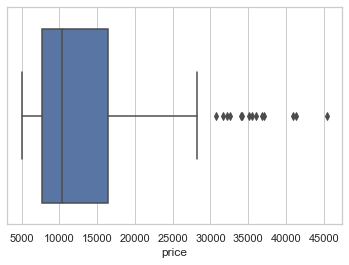

In [12]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["price"])

In [13]:
df["price"].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

* The <a href="">**variance**</a> measures how far a set of values are spread out from their average value. It is defined by the following formula: $$ \displaystyle \sigma^{2}(\mathbf{x}) = \frac{\sum_{i} x_{i} - \mu_{x}}{m}$$

In [14]:
df["price"].var()

63155863.443184026

* The <a href="">**standard deviation**</a> is the square root of the variance.

In [15]:
df["price"].std()

7947.066341939271

#### All together

We can generate a set of descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution (excluding missing values) using the <code>describe()</code> method.

In [16]:
df["price"].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

<h3 id="density_estimation">2.3 - Density estimation</h3>

Density estimation is the construction of an **estimate**, based on observed data, **of an unobservable underlying probability density function**. The unobservable density function is thought of as the density according to which a large population is distributed; the data are usually thought of as a random sample from that population.

Therefore, a density estimator is an algorithm which takes a $D$-dimensional dataset and produces an estimate of the $D$-dimensional probability distribution which data is drawn from. Of course for univariate analysis we will focus on one-dimensional datasets (only one column).

#### Continuous attributes

There are a variaty of approaches. Two of the most used ones are the **histogram** and the **kernel density estimation** (KDE) plot.

##### **Histogram**

For one dimensional data, you are probably already familiar with one simple density estimator, the histogram, whose construction follow two steps: 
1. Divide the entire range of values into a series of intervals (bins).
2. Count how many values fall into each interval. The intervals must be consecutive, adjacent and non-overlapping. In addition they are usually of equal size, but it is not required.

Histograms give a rough sense of the density of the underlying distribution of the data, and often for density estimation: estimating the probability density function of the underlying variable. The total area of a histogram used for probability density is always normalized to 1.

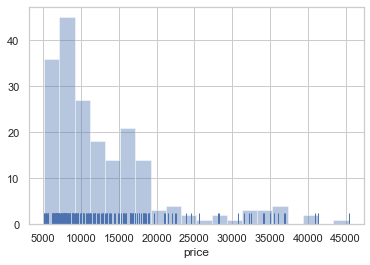

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

x = df["price"]

sns.distplot(x, kde=False, bins = 20, rug=True);
plt.show()

If we increase the number of bins, the result looks a bit messy, but is a much more robust reflection of the actual data characteristics than is the standard histogram. Still, the rough edges are not aesthetically pleasing, nor are they reflective of any true properties of the data. In order to smooth them out, <span style="color:blue">we might decide to replace the blocks at each location with a smooth function, like a **Gaussian**</span>.

##### **Kernel density estimation (KDE) plot**

Kernel density estimation is a non-parametric method to estimate the probability density function of a random variable. It has the following parameters:
* The <a href="https://en.wikipedia.org/wiki/Kernel_(statistics)">**kernel**</a>. It specifies the shape of the distribution placed at **each point**.
* The <a href="https://en.wikipedia.org/wiki/Kernel_density_estimation#Bandwidth_selection">**kernel bandwith**</a>. It controls the size of the kernel at **each point**.

<img src="images/kernel_types.png" width="500">

<span style="color:red">**Note:**</span> Non-parametric models differ from parametric models in that the model structure is not specified a priori but is instead determined from data. The term non-parametric is not meant to imply that such models completely lack parameters but that the number and nature of the parameters are flexible and not fixed in advance.

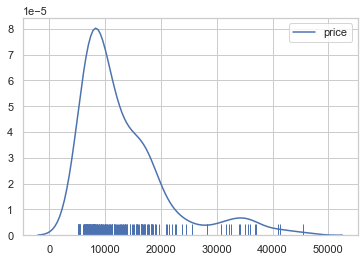

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

x = df["price"]

sns.kdeplot(x, ax=ax1)
sns.rugplot(x, linewidth=1);
plt.show()

Drawing a KDE is more computationally expensive than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

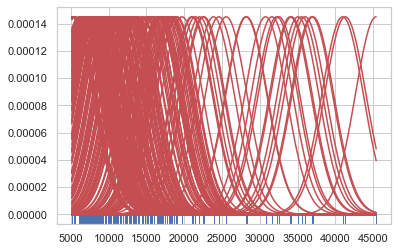

In [22]:
from scipy import stats

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

x = df["price"]
bandwidth = x.std() * x.size ** (-1 / 5.)
support = np.linspace(x.min(), x.max(), 201)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, linewidth=1);

<span style="color:red">**Note:**</span> The KDE is not only useful for descriptive purposes. It can be also used for <a href="https://en.wikipedia.org/wiki/Regression_analysis">**regression**</a> or <a href="https://en.wikipedia.org/wiki/Statistical_classification">**classification**</a> (as a better one-dimensional estimator that, for example, a gaussian). For those cases, we could use the <code>sklearn.neighbors.KernelDensity</code> estimator, which is able to handle KDE in multiple dimensions and allows to use different kinds of kernels (not only Gaussian).

##### **Histogram and KDE combined**

We can combine both diagrams to give a better idea of the underlying distribution.

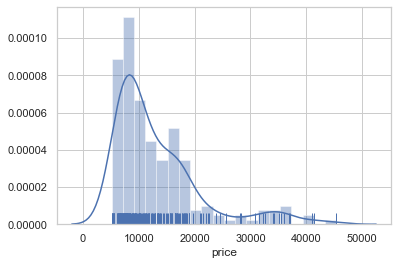

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

x = df["price"]

sns.distplot(x, bins = 20, rug=True);

plt.show()

### Discrete/Categorical attributes

In the case of discrete/categorical variables there is only one way to represent its probability distribution, the histogram, where each category is represented by an "interval"

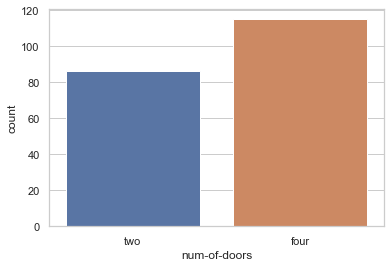

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

sns.countplot(x="num-of-doors", data=df)

plt.show()

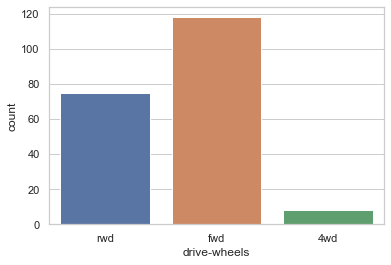

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))
sns.countplot(x="drive-wheels", data=df)

<h2 id="bivariate_descriptive_analysis">3 - Bivariate descriptive analysis</h2>

Bivariate descriptive analysis is used to describe the relationship between a pair of variables.

<h3 id="analysis_via_visualization">3.1 - Analysis via visualization</h3>

In order to understand the relationships between a couple of variables we can use plots, whose form will change depending on the variables' types.

#### Numerical & Numerical

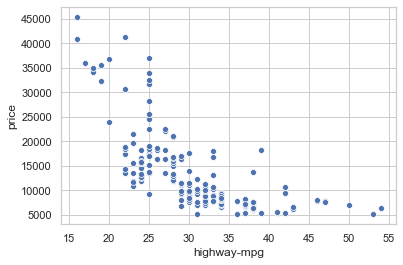

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

sns.scatterplot(x=df["highway-mpg"], y=df["price"])
#sns.regplot(x=df["highway-mpg"], y=df["price"])

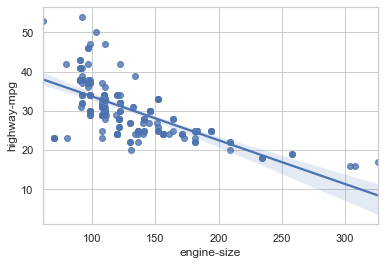

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

sns.regplot(x=df["engine-size"], y=df["highway-mpg"])

plt.show()

More information about plots between numerical variables with Seaborn can be found <a href="https://seaborn.pydata.org/tutorial/regression.html">**in the documentation**</a>

#### Categorical & Numerical

There are several available plots for visualizing changes in a numerical variable conditioned on a categorical one. We can find them using the <code>catplot</code> function, which generates a categorical scatterplot (one scatterplot per category).

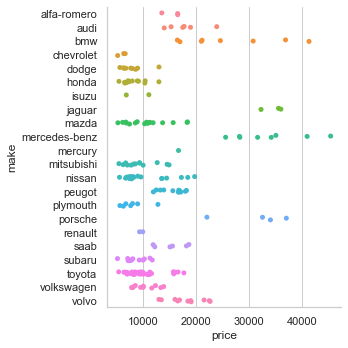

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="price", y="make", data=df);

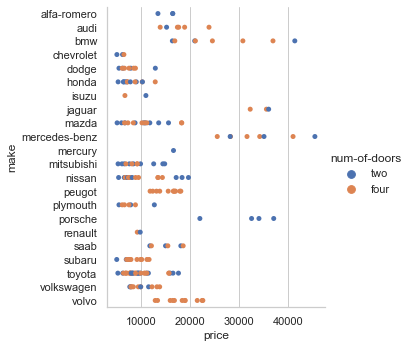

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="price", y="make", hue="num-of-doors", data=df, jitter=False); # we can change the width of the points via the jitter attribute

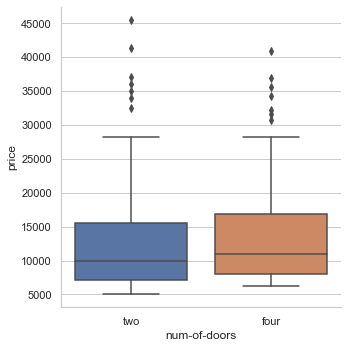

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="num-of-doors", y="price", kind = "box", data=df)

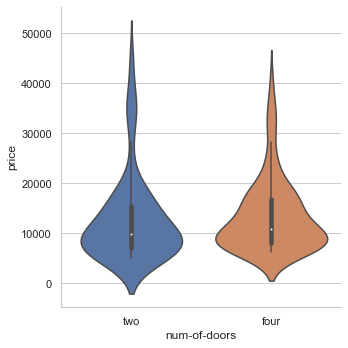

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="num-of-doors", y="price", kind="violin", data=df)

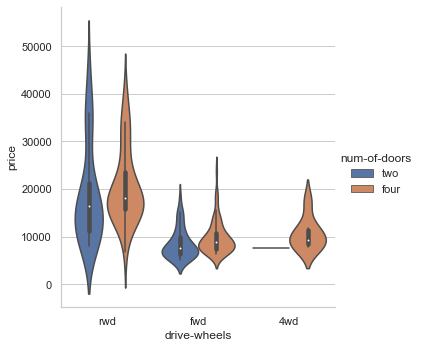

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="drive-wheels", y="price", hue="num-of-doors", kind="violin", data=df); 

# The split attribute allow us to split each violin in two, reducing its size, but loses information on the boxplot part
#sns.catplot(x="drive-wheels", y="price", hue="num-of-doors", kind="violin", split=True, data=df); 

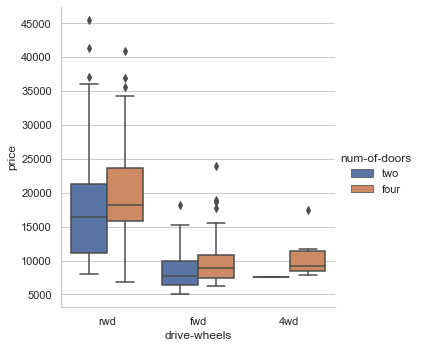

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="drive-wheels", y="price", hue="num-of-doors", kind="box", data=df)

* The **violin plot** shows a better representation of the underlying probability distribution.
* The **box plot** shows the existance of outliers better than the violin plot.

#### Categorical & Categorical

We get that "line" on the 4 wheels case with two doors because there is only one instance and the distribution then follows a <a href="https://en.wikipedia.org/wiki/Dirac_delta_function">**Dirac function**</a> (no variance).

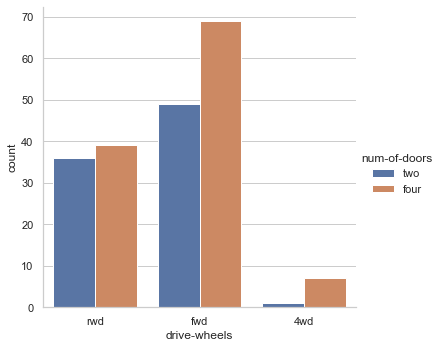

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="drive-wheels", hue="num-of-doors", kind="count", data=df)

<h3 id="analysis_via_visualization">3.1 - Correlation</h3>

Correlation is a statical measure of dependence. In the ML literature, its usually referred to the Pearson's correlation coefficient $\rho$, which measures linear dependence between two variables. It has a value between $+1$ and $−1$, where $1$ is total positive linear correlation, $0$ is no linear correlation, and $−1$ is total negative linear correlation. It is a symmetric measure. Given a pair of random variables $\displaystyle (X,Y)$, their pearson correlation $\rho_{X,Y}$ is

$$ \rho_{X,Y} = \frac{cov(X,Y)}{\sigma_{X} \sigma_{Y}},$$ 

where the estimation of $cov(X,Y)$ is done via the following formula: 

$$ cov(X,Y) = \frac{1}{m-1} \sum_{i}^{m} (x_{i} - \bar{x})(y_{i} - \bar{y})$$

#### Properties

* Symmetry. $\rho_{X,Y} = \rho_{Y,X}$
* Normalized in $[-1,1]$.

#### Correlation and independence

If the variables are independent, Pearson's correlation coefficient is 0, but the converse is not true because the correlation coefficient detects only **linear** dependencies between two variables.

<img src="images/correlation_independence.png" width="600">

In [40]:
print(df[["highway-mpg", "price"]].corr())
print(df[["engine-size", "price"]].corr())

             highway-mpg     price
highway-mpg     1.000000 -0.704692
price          -0.704692  1.000000
             engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000


#### Correlation matrix

<span style="color:red">**Note:** <code>df.corr()</code> automatically excludes non-numerical columns from the estimation</span>

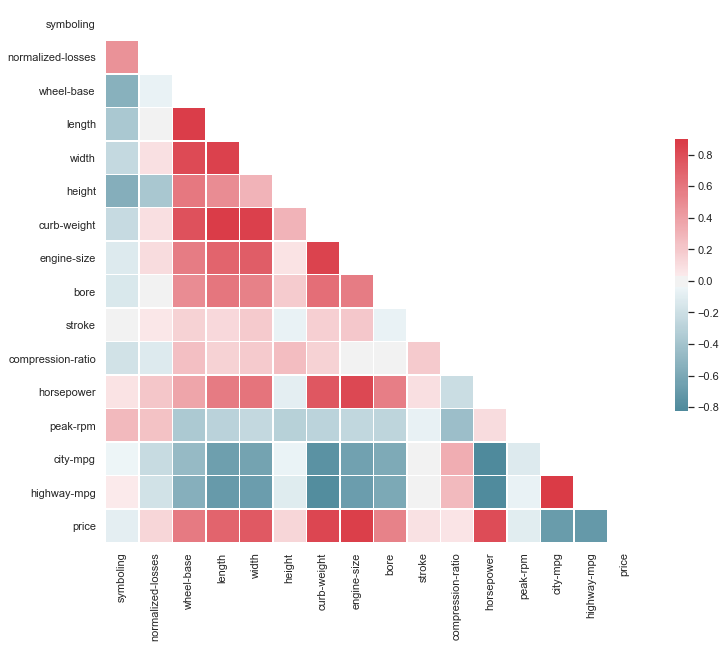

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:
df.corr()["price"]

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082269
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
Name: price, dtype: float64

<h3 id="mutual_information">3.2 - Mutual information</h3>

<img src="images/correlation_examples.png" width="600">

One important caveat of the correlation coefficient is its inability to consider nonlinear dependence relationships. For this reason we can complement it by estimating the bivariate <a href="https://en.wikipedia.org/wiki/Mutual_information">**Mutual information**</a>.

Additionally, the mutual information is not limited to numerical variables, it can be estimated for categorical and numerical variables. While it is formally defined for categorical variables (exact), it can be approximately estimated for pairs of numerical variables and mixed pairs too.

#### Example

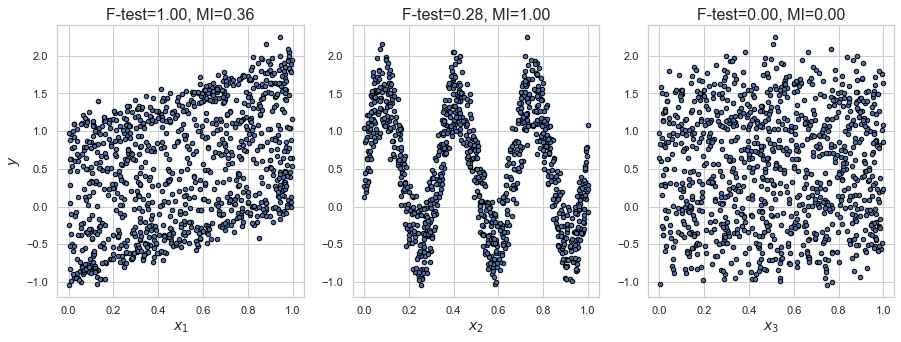

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif

mutual_info_regression(df[["highway-mpg"]], df["price"])

In [ ]:
mutual_info_classif(df[["price"]], df["num-of-doors"])
#sns.catplot(x="num-of-doors", y="price", kind = "violin", data=df) # We can graphically see why its MI is so low...

<h3 id="normalized_mutual_information">3.3 - Normalized mutual information</h3>

We can also use its <a href="https://en.wikipedia.org/wiki/Mutual_information#Normalized_variants">normalized variant</a> which is limited to the range [0.0, 1.0].

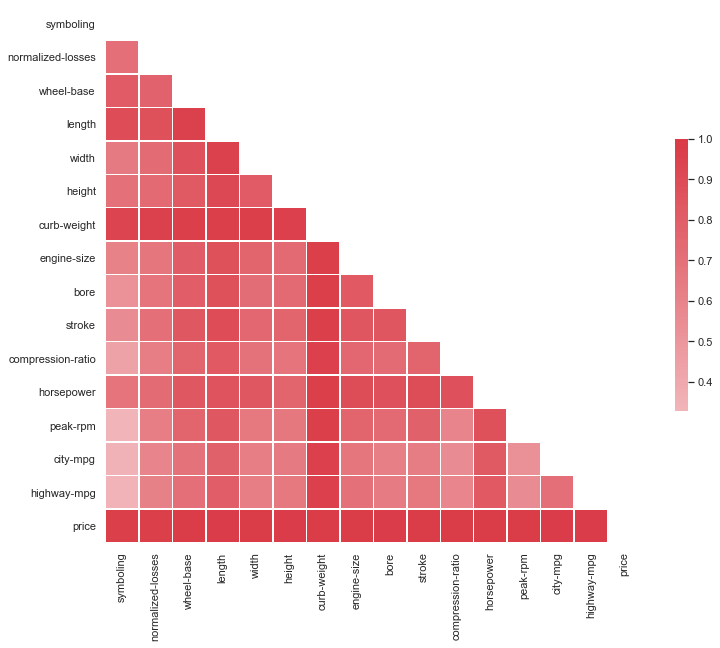

In [50]:
from sklearn.metrics import normalized_mutual_info_score as nmi
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Only numerical variables
nmi_df = pd.DataFrame(columns=df.select_dtypes(exclude="object").columns, index=df.select_dtypes(exclude="object").columns)

# All variables (it will be estimated approximately)
#nmi_df = pd.DataFrame(columns=df.columns, index=df.columns)

for col_1 in nmi_df.columns:
    for col_2 in nmi_df.columns:
        nmi_df.loc[col_1, col_2] = nmi(df[col_1], df[col_2], average_method="min")

for col in nmi_df.columns:
    nmi_df[col] = pd.to_numeric(nmi_df[col])

for col in nmi_df.columns:
    nmi_df[col] = nmi_df[col].astype("float64")        

# Generate a mask for the upper triangle
mask = np.zeros_like(nmi_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(nmi_df, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [51]:
nmi_df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.706677,0.814541,0.899261,0.656099,0.695851,0.944392,0.609002,0.516947,0.556242,0.434377,0.681466,0.328757,0.347642,0.342581,0.973841
normalized-losses,0.706677,1.000000,0.772033,0.880726,0.734845,0.747009,0.959918,0.679780,0.683264,0.708531,0.632233,0.733408,0.628423,0.595556,0.609981,0.972127
wheel-base,0.814541,0.772033,1.000000,0.959474,0.868912,0.823767,0.973480,0.805048,0.799821,0.840650,0.760572,0.837356,0.767272,0.689181,0.703777,0.990360
length,0.899261,0.880726,0.959474,1.000000,0.954130,0.916483,0.972149,0.877976,0.875690,0.902425,0.828408,0.865530,0.837592,0.779840,0.796995,0.982736
width,0.656099,0.734845,0.868912,0.954130,1.000000,0.811251,0.973333,0.770717,0.726617,0.755384,0.689260,0.837813,0.656532,0.629937,0.628382,0.985365
height,0.695851,0.747009,0.823767,0.916483,0.811251,1.000000,0.967170,0.741707,0.739194,0.756526,0.686412,0.767035,0.664581,0.648988,0.658952,0.982753
curb-weight,0.944392,0.959918,0.973480,0.972149,0.973333,0.967170,1.000000,0.971922,0.968779,0.969115,0.967804,0.971109,0.972157,0.964659,0.964064,0.986391
engine-size,0.609002,0.679780,0.805048,0.877976,0.770717,0.741707,0.971922,1.000000,0.830905,0.842681,0.753488,0.890877,0.766937,0.676994,0.701584,0.985711
bore,0.516947,0.683264,0.799821,0.875690,0.726617,0.739194,0.968779,0.830905,1.000000,0.848494,0.734891,0.873968,0.738778,0.622394,0.642099,0.983072
stroke,0.556242,0.708531,0.840650,0.902425,0.755384,0.756526,0.969115,0.842681,0.848494,1.000000,0.756743,0.890056,0.782921,0.636686,0.660223,0.987441


In [ ]:
nmi_df["price"]

## References

#### Books
1. Bishop, C. M. (2006). "Pattern recognition and machine learning". Springer.
2. Murphy, K. P. (2012). "Machine Learning: A probabilistic perspective". MIT Press.
3. Stockburger D. W. (2016). "Multivariate statistics: concepts, models and applications".

#### Links
1. <a href="https://www.coursera.org/learn/data-analysis-with-python/">Santarcangelo, J. (2019). "Data analysis with Python".</a>